In [1]:
df_train <- read.csv(file = 'sources/train.csv')

In [228]:
what(dname = getwd())

ERROR: Error in what(dname = getwd()): could not find function "what"


In [229]:
summary(df_train)

   MSSubClass       MSZoning     LotFrontage        LotArea        Street    
 Min.   : 20.0   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00   1st Qu.:  7554   Pave:1454  
 Median : 50.0   RH     :  16   Median : 69.00   Median :  9478              
 Mean   : 56.9   RL     :1151   Mean   : 70.05   Mean   : 10517              
 3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00   3rd Qu.: 11602              
 Max.   :190.0                  Max.   :313.00   Max.   :215245              
                                NA's   :259                                  
  Alley      LotShape  LandContour  Utilities      LotConfig    LandSlope 
 Grvl:  50   IR1:484   Bnk:  63    AllPub:1459   Corner : 263   Gtl:1382  
 Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1   CulDSac:  94   Mod:  65  
 NA's:1369   IR3: 10   Low:  36                  FR2    :  47   Sev:  13  
             Reg:925   Lvl:1311                  FR3    :   4             
 

In [2]:
install.packages("dplyr")
library(dplyr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# Supprime la colonne Id du dataset
df_train <- select(df_train,-c(Id))

# Affiche la matrice de corrélation sur le dataset

In [4]:
install.packages("corrplot")
library("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded


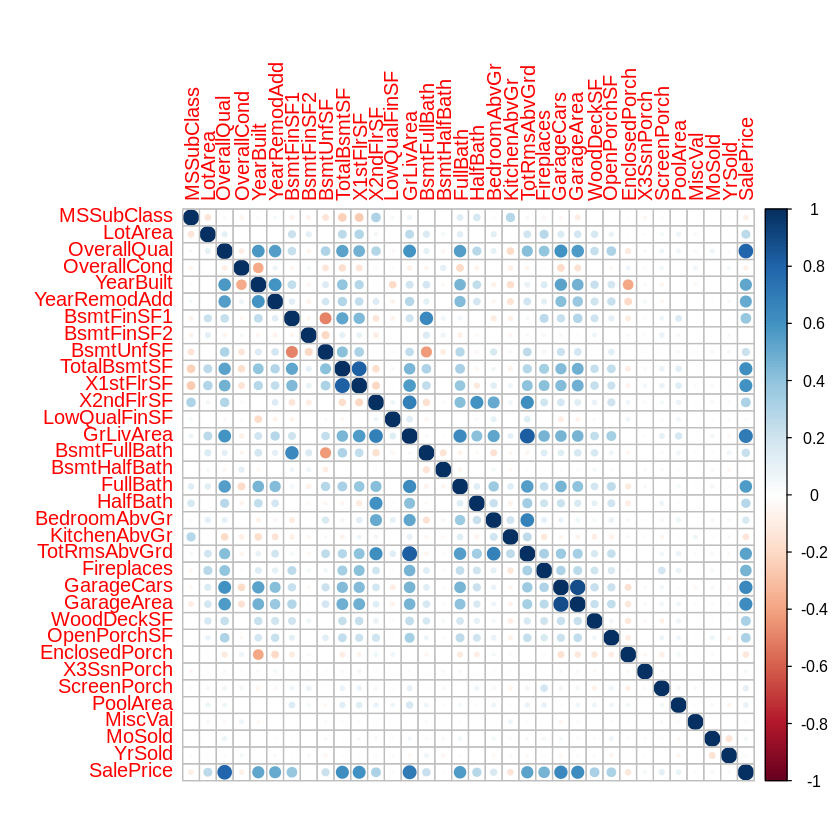

In [5]:
nums <- unlist(lapply(df_train, is.numeric))
df_train_nums <- df_train[,nums]
matcor <- cor(df_train_nums[,c(-2,-8,-25)])
corrplot(matcor)

# Affiche la correlation des features vs SalePrice

In [6]:
sale_corr <- matcor[,'SalePrice']
sorted_corr = sort(sale_corr, decreasing = TRUE)
sorted_corr

SalePrice   OverallQual     GrLivArea    GarageCars    GarageArea 
   1.00000000    0.79098160    0.70862448    0.64040920    0.62343144 
  TotalBsmtSF     X1stFlrSF      FullBath  TotRmsAbvGrd     YearBuilt 
   0.61358055    0.60585218    0.56066376    0.53372316    0.52289733 
 YearRemodAdd    Fireplaces    BsmtFinSF1    WoodDeckSF     X2ndFlrSF 
   0.50710097    0.46692884    0.38641981    0.32441344    0.31933380 
  OpenPorchSF      HalfBath       LotArea  BsmtFullBath     BsmtUnfSF 
   0.31585623    0.28410768    0.26384335    0.22712223    0.21447911 
 BedroomAbvGr   ScreenPorch      PoolArea        MoSold    X3SsnPorch 
   0.16821315    0.11144657    0.09240355    0.04643225    0.04458367 
   BsmtFinSF2  BsmtHalfBath       MiscVal  LowQualFinSF        YrSold 
  -0.01137812   -0.01684415   -0.02118958   -0.02560613   -0.02892259 
  OverallCond    MSSubClass EnclosedPorch  KitchenAbvGr 
  -0.07785589   -0.08428414   -0.12857796   -0.13590737

# Analyse en Composantes

In [143]:
install.packages("FactoMineR")
install.packages('factoextra')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [193]:
library(FactoMineR)
library(factoextra)
res_pca<-PCA(df_train[,nums])
res_pca$eig

Warning message in PCA(df_train[, nums]):
“Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package”

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,7.903708e+00,2.136137e+01,21.36137
comp 2,3.206546e+00,8.666340e+00,30.02771
comp 3,2.575493e+00,6.960791e+00,36.98850
comp 4,2.025791e+00,5.475112e+00,42.46362
comp 5,1.490467e+00,4.028289e+00,46.49191
comp 6,1.193723e+00,3.226279e+00,49.71818
comp 7,1.151870e+00,3.113162e+00,52.83135
comp 8,1.133290e+00,3.062947e+00,55.89429
comp 9,1.109353e+00,2.998250e+00,58.89254
comp 10,1.094935e+00,2.959283e+00,61.85183


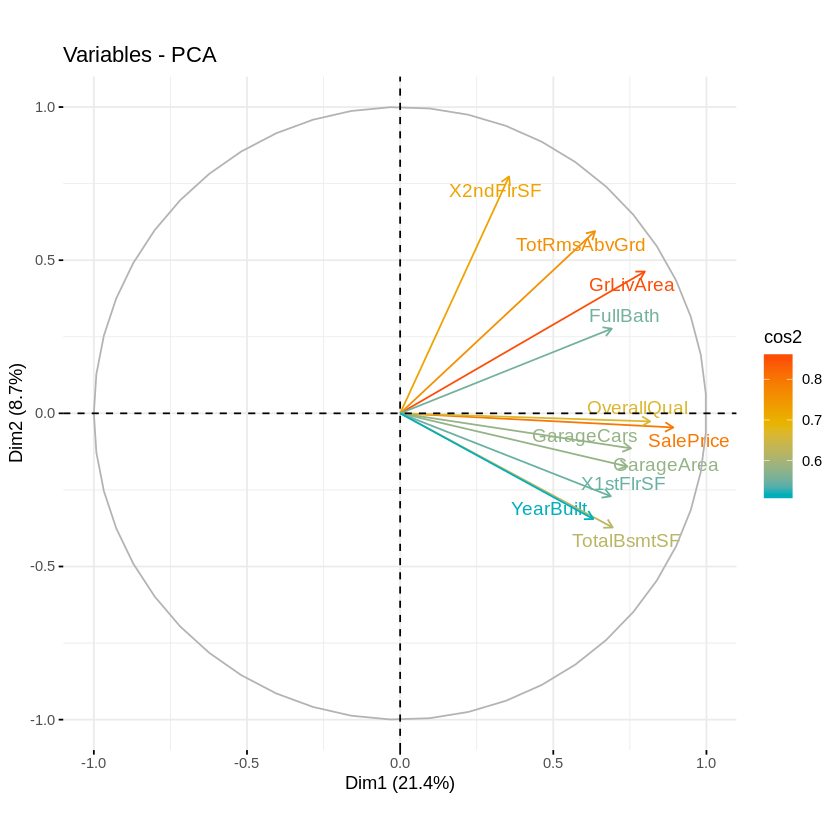

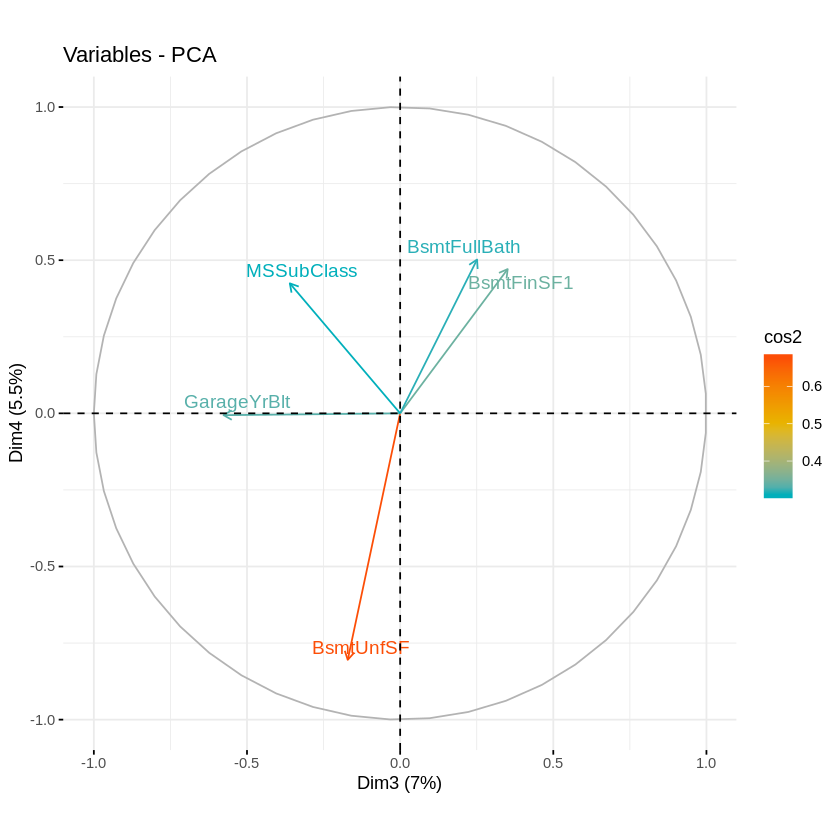

In [195]:
fviz_pca_var(res_pca, col.var="cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             select.var = list(name = NULL, cos2 = NULL, contrib=11) # 11 car res_pca$eig de dim 1 = 7,9 & dim 2 = 3,2 cette valeur représente le nombre de feature de la dim vs le nombre total de feature
)
fviz_pca_var(res_pca, col.var="cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             axes = c(3,4),
             select.var = list(name = NULL, cos2 = NULL, contrib=5)
)

Warning message:
“position_dodge requires non-overlapping x intervals”

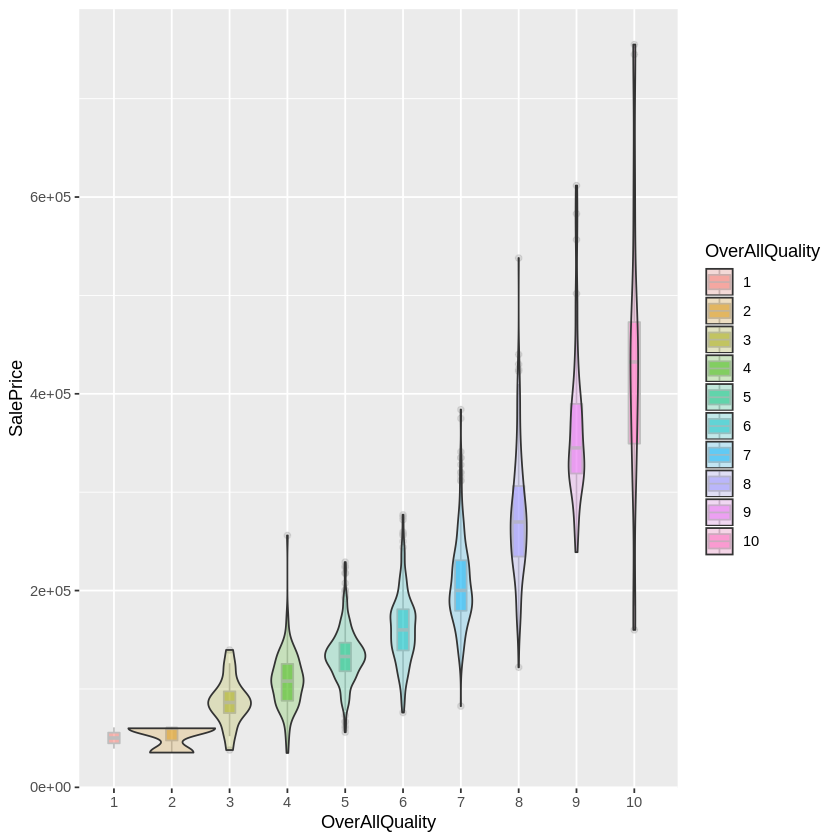

In [136]:
OverAllQuality <- factor(df_train$OverallQual)
SalePrice <- df_train$SalePrice
ggplot(df_train, aes(x=OverAllQuality, y=SalePrice, fill=OverAllQuality)) + geom_boxplot(width=0.2, color="grey", alpha=0.5) + geom_violin(width=1.5, alpha=0.2)

In [119]:
top10 <- head(sorted_corr, 10)

[1] "SalePrice"    "OverallQual"  "GrLivArea"    "GarageCars"   "GarageArea"  
 [6] "TotalBsmtSF"  "X1stFlrSF"    "FullBath"     "TotRmsAbvGrd" "YearBuilt"

In [12]:
install.packages('psych')
library(psych)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



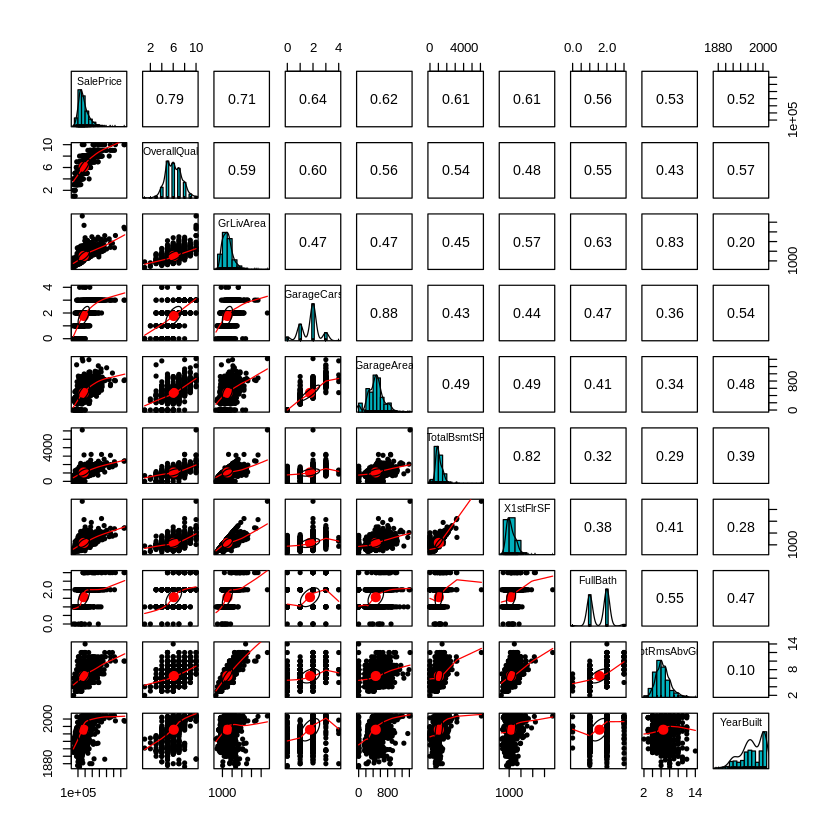

In [122]:
pairs.panels(df_train[,names(top10)], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)

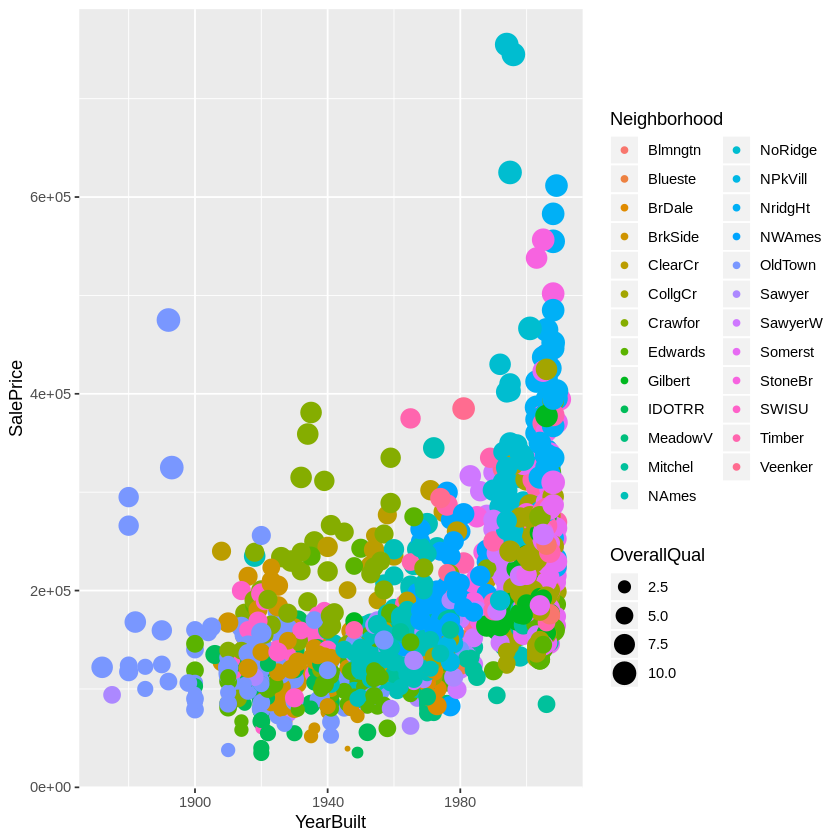

In [225]:
ggplot(df_train, aes(x=YearBuilt, y=SalePrice, size=OverallQual , color=Neighborhood)) + geom_point()
# ggplot(df_train, aes(x=PoolArea, y=SalePrice, color=OverallQual)) + geom_point()